In [4]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
def show_img(titulo, image):
    cv2.imshow(titulo, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

# Histogramas

![alt text](image.png)

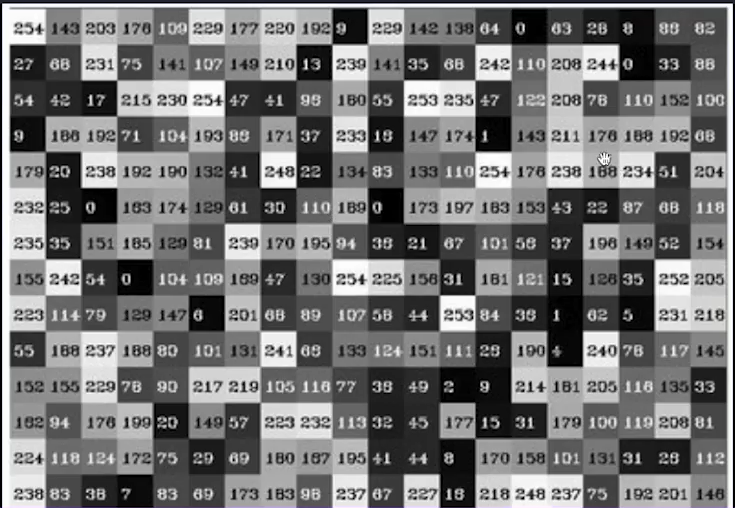

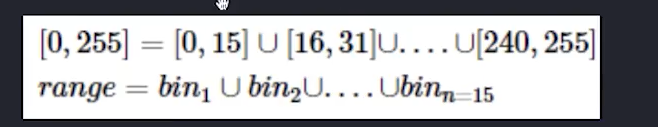

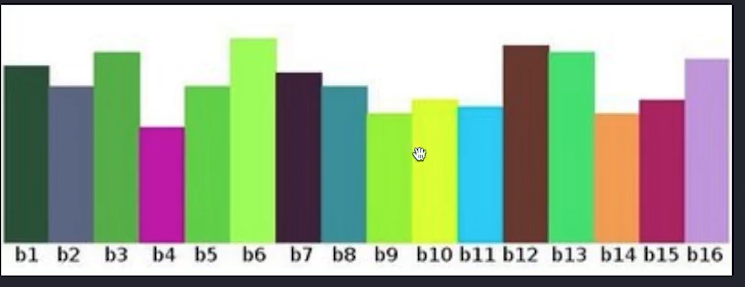

In [6]:
def show_img(titulo, image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,6))
    plt.imshow(image_rgb)
    plt.title(titulo)
    plt.axis('off')
    plt.show()
    

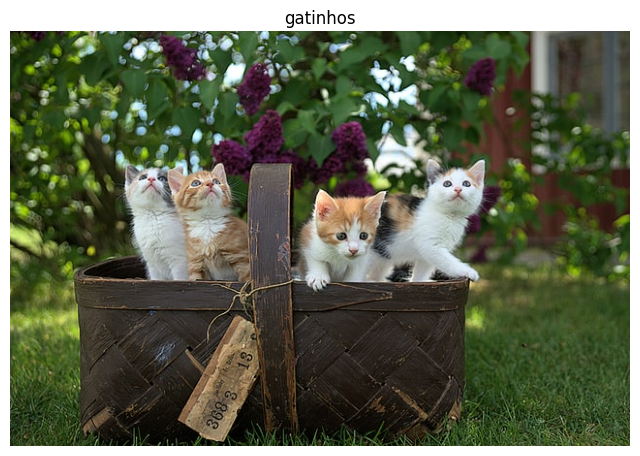

In [7]:
img = cv2.imread("OpenCV/assets/fotos/cats.jpg")
show_img('gatinhos', img)
blank = np.zeros(img.shape[:2],dtype='uint8')

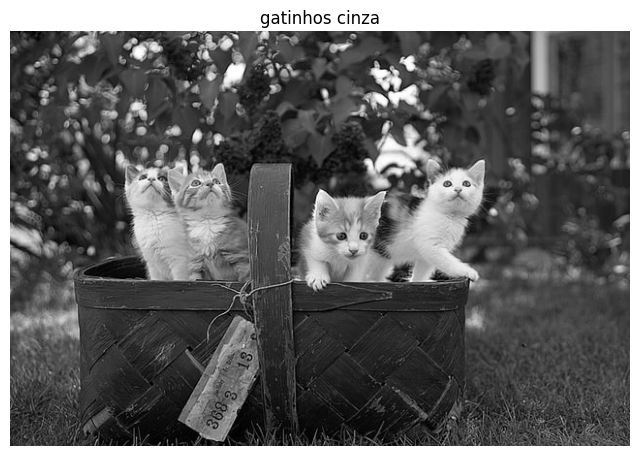

In [8]:
cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img('gatinhos cinza', cinza)

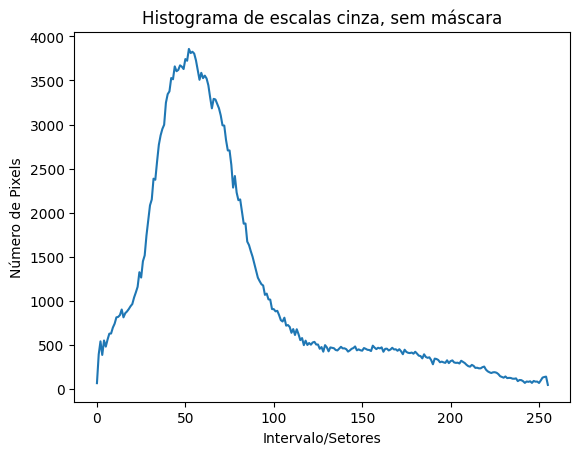

In [9]:
cinza_hist = cv2.calcHist([cinza],[0],None,[256], [0,256])

plt.figure()
plt.title("Histograma de escalas cinza, sem máscara")
plt.xlabel('Intervalo/Setores')
plt.ylabel('Número de Pixels')
plt.plot(cinza_hist)
plt.show()

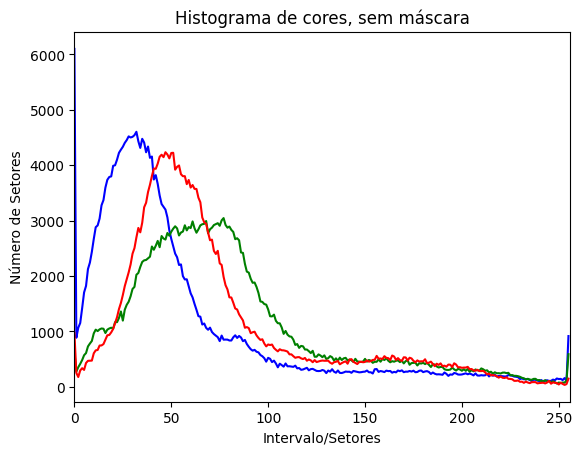

In [10]:
plt.figure()
plt.title('Histograma de cores, sem máscara')
plt.xlabel('Intervalo/Setores')
plt.ylabel('Número de Setores')
colors = ['b','g','r']
for channel, cor in enumerate(colors):
    hist = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(hist,color=cor)
    plt.xlim([0,256])
    
plt.show()

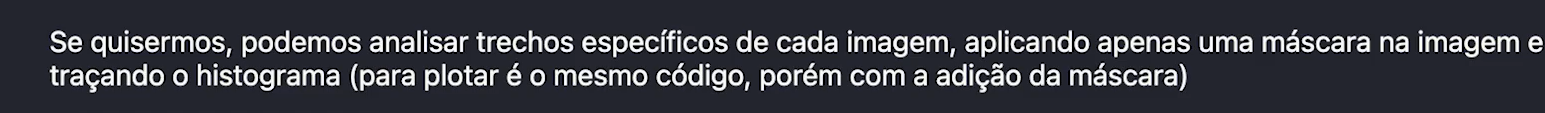

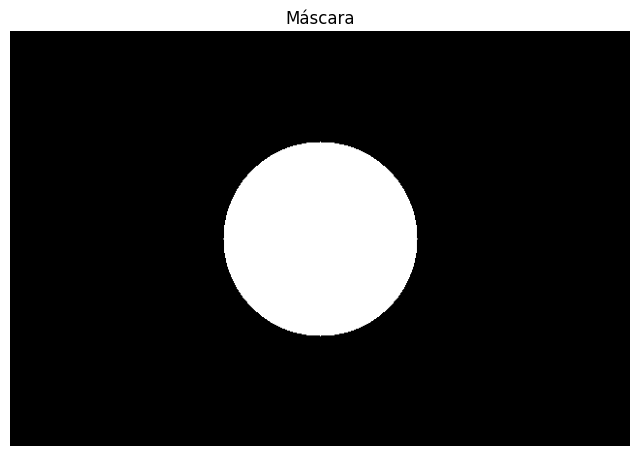

In [11]:
mask = cv2.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100,255,-1)

show_img('Máscara',mask)

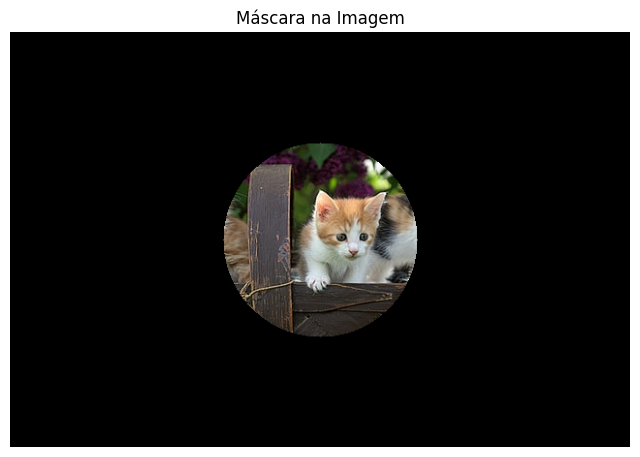

In [12]:
masked = cv2.bitwise_and(img,img,mask=mask)
show_img("Máscara na Imagem", masked)

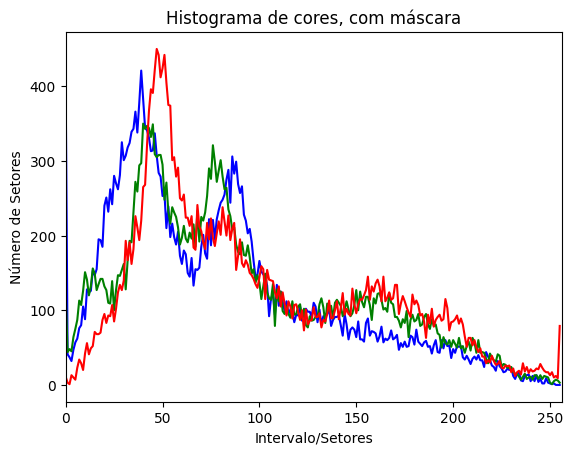

In [13]:
plt.figure()
plt.title('Histograma de cores, com máscara')
plt.xlabel('Intervalo/Setores')
plt.ylabel('Número de Setores')
colors = ['b','g','r']
for channel, cor in enumerate(colors):
    #hist = cv2.calcHist([img],[channel],None,[256],[0,256])
    hist = cv2.calcHist([img],[channel],mask,[256],[0,256])
    plt.plot(hist,color=cor)
    plt.xlim([0,256])
    
plt.show()